In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [2]:
df = pd.read_csv("User_Data.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
for column in df.columns:
    print(column)
    print(df[column].nunique())
    print("\n\n")

User ID
400



Gender
2



Age
43



EstimatedSalary
117



Purchased
2





In [7]:
for column in df.columns:
    print(column)
    print(df[column].unique())
    print("\n\n")

User ID
[15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829
 15600575 15727311 15570769 15606274 15746139 15704987 15628972 15697686
 15733883 15617482 15704583 15621083 15649487 15736760 15714658 15599081
 15705113 15631159 15792818 15633531 15744529 15669656 15581198 15729054
 15573452 15776733 15724858 15713144 15690188 15689425 15671766 15782806
 15764419 15591915 15772798 15792008 15715541 15639277 15798850 15776348
 15727696 15793813 15694395 15764195 15744919 15671655 15654901 15649136
 15775562 15807481 15642885 15789109 15814004 15673619 15595135 15583681
 15605000 15718071 15679760 15654574 15577178 15595324 15756932 15726358
 15595228 15782530 15592877 15651983 15746737 15774179 15667265 15655123
 15595917 15668385 15709476 15711218 15798659 15663939 15694946 15631912
 15768816 15682268 15684801 15636428 15809823 15699284 15786993 15709441
 15710257 15582492 15575694 15756820 15766289 15593014 15584545 15675949
 15672091 15801658 15706185 15789863 157209

User ID
Axes(0.125,0.11;0.775x0.77)





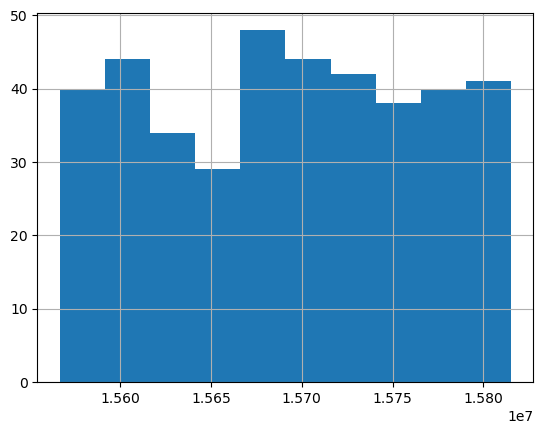

Gender
Axes(0.125,0.11;0.775x0.77)





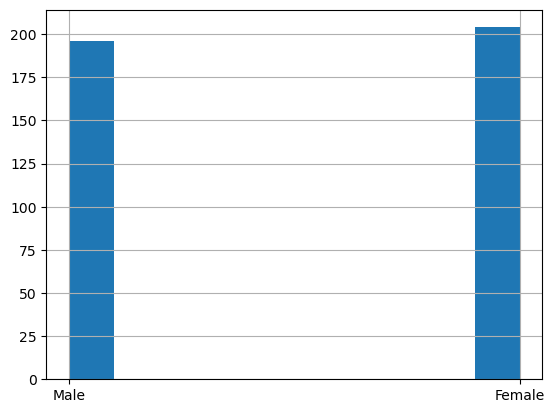

Age
Axes(0.125,0.11;0.775x0.77)





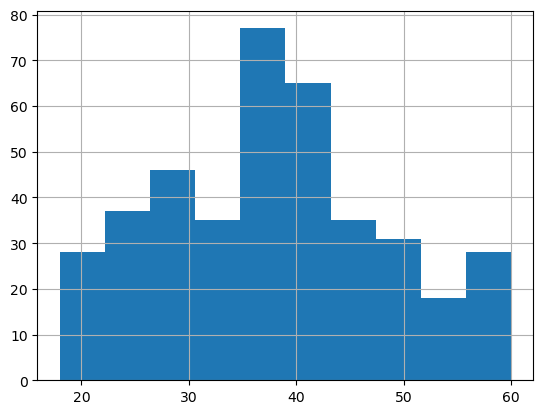

EstimatedSalary
Axes(0.125,0.11;0.775x0.77)





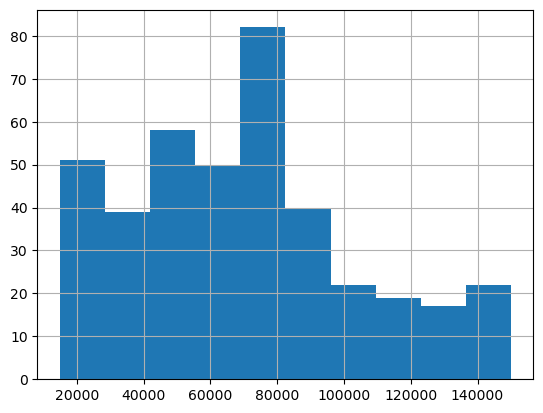

Purchased
Axes(0.125,0.11;0.775x0.77)





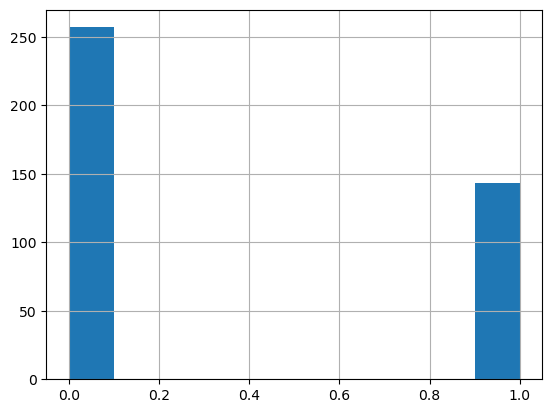

In [8]:
for column in df.columns:
    print(column)
    print(df[column].hist())
    print("\n\n")
    plt.show()

In [9]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [10]:
X = df.drop(['Purchased', "User ID", "Gender"], axis=1).values
Y = df['Purchased'].values

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.05, random_state=0)

In [12]:
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

In [13]:
model = DecisionTreeClassifier()

model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [14]:
Y_pred = model.predict(X_test)

In [15]:
confusion_matrix(Y_test, Y_pred)

array([[16,  2],
       [ 0,  2]])

In [16]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.50      1.00      0.67         2

    accuracy                           0.90        20
   macro avg       0.75      0.94      0.80        20
weighted avg       0.95      0.90      0.91        20



/var/folders/wc/khxb4zsj41g41ycbv7f_3fr00000gn/T/ipykernel_41716/3492271633.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == j, 0], X[y == j, 1], c=ListedColormap(['purple', 'green'])(i), label=f"Class {j}")


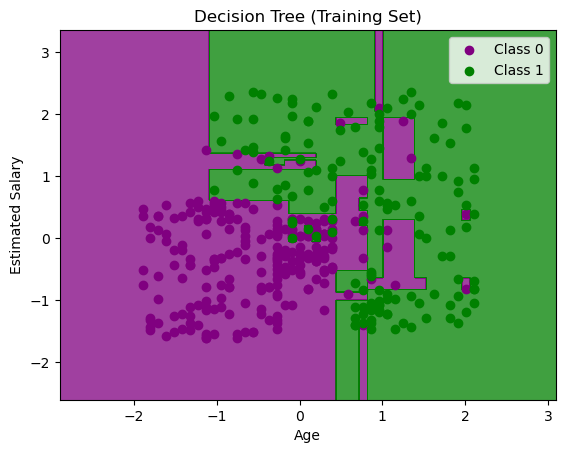

/var/folders/wc/khxb4zsj41g41ycbv7f_3fr00000gn/T/ipykernel_41716/3492271633.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == j, 0], X[y == j, 1], c=ListedColormap(['purple', 'green'])(i), label=f"Class {j}")


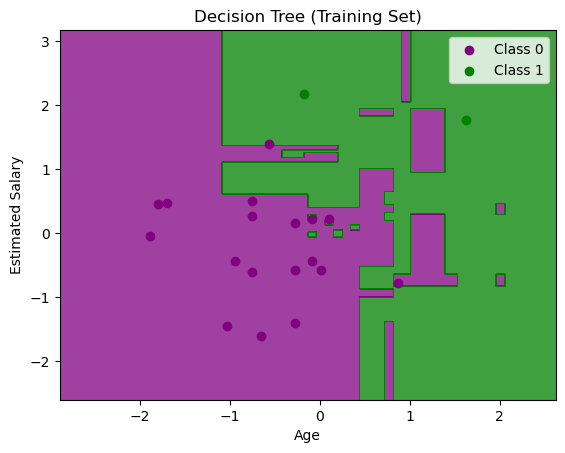

In [17]:
def plot_decision_boundary(classifier, X, y, title="Decision Boundary", xlabel="Feature 1", ylabel="Feature 2"):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

    # Predict and reshape for visualization
    preds = classifier.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    # Plot the decision boundary
    plt.contourf(x1, x2, preds, alpha=0.75, cmap=ListedColormap(['purple', 'green']))

    # Scatter plot for data points
    for i, j in enumerate(np.unique(y)):
        plt.scatter(X[y == j, 0], X[y == j, 1], c=ListedColormap(['purple', 'green'])(i), label=f"Class {j}")

    # Titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    
plot_decision_boundary(model, X_train, Y_train, title="Decision Tree (Training Set)", xlabel="Age", ylabel="Estimated Salary")
plot_decision_boundary(model, X_test, Y_test, title="Decision Tree (Training Set)", xlabel="Age", ylabel="Estimated Salary")
